In [65]:
import numpy as np
import pandas as pd

In [66]:
df = pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [67]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [68]:
df.duplicated().sum()

2

In [69]:
df.drop_duplicates(inplace=True)

In [70]:
df.shape

(299, 9)

In [71]:
import matplotlib.pyplot as plt

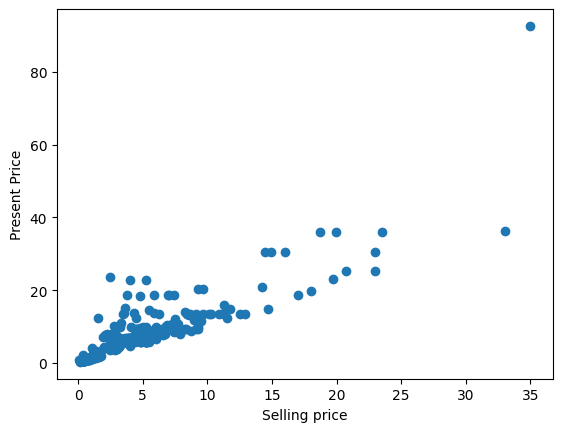

In [72]:
plt.scatter(np.array(df["Selling_Price"]), np.array(df["Present_Price"]))
plt.xlabel("Selling price")
plt.ylabel("Present Price")
plt.show()

# Deleting outliers

In [73]:
df[df["Present_Price"] > 80]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [74]:
df.drop(86, axis=0, inplace=True)

In [75]:
df.shape

(298, 9)

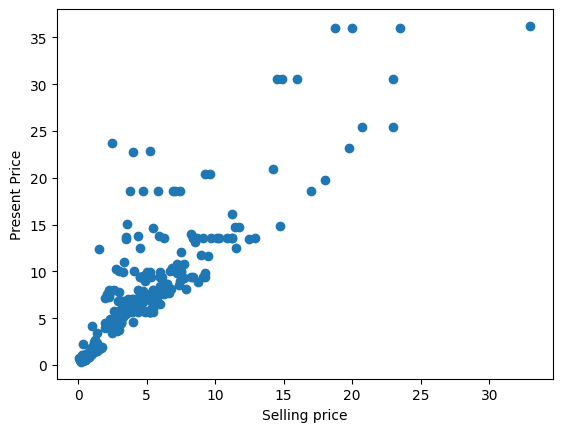

In [76]:
plt.scatter(np.array(df["Selling_Price"]), np.array(df["Present_Price"]))
plt.xlabel("Selling price")
plt.ylabel("Present Price")
plt.show()

In [77]:
data = df.drop(columns="Car_Name")
data.sample(5)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
56,2015,4.5,7.27,40534,Petrol,Dealer,Manual,0
139,2015,0.6,0.95,16600,Petrol,Individual,Manual,0
245,2012,5.2,9.40,71000,Diesel,Dealer,Manual,0
83,2015,12.5,13.46,38000,Diesel,Dealer,Manual,0
82,2017,23.0,25.39,15000,Diesel,Dealer,Automatic,0


# Preprocessing

In [78]:
d1 = {"Petrol":int(0), "Diesel":int(1)}
d2 = {"Dealer":2, "Individual":3}
d3 = {"Manual":4, "Automatic":5}

data["Fuel_Type"] = data["Fuel_Type"].map(d1)
data["Selling_type"] = data["Selling_type"].map(d2)
data["Transmission"] = data["Transmission"].map(d3)

data.sample(5)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
82,2017,23.00,25.39,15000,1.0,2,5,0
264,2015,4.00,7.00,40026,0.0,2,4,0
158,2017,0.48,0.54,8600,0.0,3,4,0
102,2017,1.65,1.78,4000,0.0,3,4,0
164,2016,0.45,0.54,14000,0.0,3,4,0


In [79]:
data.isna().sum()
data.dropna(inplace=True)

# Training and testing data split

In [80]:
X = data.drop(columns="Selling_Price")
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0.0,2,4,0
1,2013,9.54,43000,1.0,2,4,0
2,2017,9.85,6900,0.0,2,4,0
3,2011,4.15,5200,0.0,2,4,0
4,2014,6.87,42450,1.0,2,4,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1.0,2,4,0
297,2015,5.90,60000,0.0,2,4,0
298,2009,11.00,87934,0.0,2,4,0
299,2017,12.50,9000,1.0,2,4,0


In [81]:
y = data["Selling_Price"]
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 296, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Model training

Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

# Model evaluation

In [85]:
from sklearn.metrics import r2_score
predicted_y = model1.predict(X_test)
predicted_y

array([ 5.62470577,  7.20047238,  4.29550554,  9.74790861,  6.5127231 ,
       -2.33344787,  8.33647987,  5.76067679,  7.8223134 ,  5.40717764,
        1.65701656,  3.90039971,  7.78603111,  1.93669485,  1.58476371,
        9.50767922,  3.71732149,  4.27987341,  7.83543676,  5.61125933,
        7.86457114,  7.14796079,  7.85305551,  3.56875398,  4.21443457,
       17.01216999,  4.72712324,  1.31282882,  1.69728084,  4.0834891 ,
        3.13728252,  2.49224069,  0.67497038, 10.88085882,  4.37633681,
        8.73066293,  3.88528209,  9.40095128, -0.41840714, -1.36371887,
        5.58400303,  2.44144978,  2.61695412,  5.56423529,  8.28084704,
        8.06111759, 21.5918494 , -1.90378124,  4.1229357 ,  9.57973414,
        1.8173499 ,  6.91700177,  5.09363399,  0.03369435,  9.38645001,
       -0.93368666,  5.38425132,  2.10484297,  0.0440517 , -0.83492022])

In [86]:
print(r2_score(predicted_y, y_test))

0.85244954186738


In [93]:
print(model1.predict(np.array([2015,8.92,42367,1,2,4,0]).reshape(1,-1))[0])

7.059393299949647


C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [100]:
def predictor_fn(year, present_price, distance_trav, fuel_type, selling_type, transmission, owner):
    if fuel_type == "Petrol":
        fuel_type = 0
    elif fuel_type == "Diesel":
        fuel_type = 1
    
    if selling_type == "Dealer":
        selling_type = 2
    elif selling_type == "Individual":
        selling_type = 3
        
    if transmission == "Manual":
        transmission = 4
    elif transmission == "Automatic":
        transmission = 5
    print(model1.predict(np.array([year, present_price, distance_trav, fuel_type, selling_type, transmission, owner]).reshape(1,-1))[0])
    

In [101]:
predictor_fn(2016,10.79,43000,"Diesel","Dealer","Manual",0)

8.434432275225618


C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [102]:
predictor_fn(2013,9.54,43000,"Diesel","Dealer","Manual",0)

6.623688857843035


C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [103]:
predictor_fn(2016,7.87,24524,"Petrol","Dealer","Automatic",0)

6.367429049419229


C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [104]:
predictor_fn(2016,7.6,17000,"Petrol","Dealer","Manual",0)

5.564235293308457


C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [105]:
predictor_fn(2016,13.6,35934,"Diesel","Dealer","Manual",0)

9.976164783927288


C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [107]:
predictor_fn(2013,9.54,43000,"Diesel","Dealer","Manual",0)

6.623688857843035


C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [108]:
predictor_fn(2014,7.13,34000,"Petrol","Dealer","Manual",0)

4.448094613385706


C:\Users\Arnab Sadhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
